In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:

df = pd.read_csv('/content/drive/MyDrive/Amazon_reviews_cleaned_finalform.csv')
df.head(5)

,asin,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews
0,B07HBDNGHC,4.0,auf die funktion der box gehe ich nur kurz ein...,165,43,0,3,0,352,2108,5.0,1.0
1,B07HBDNGHC,4.0,ich hielt die toniebox immer für einen überteu...,542,174,0,6,7,1135,7647,5.7,1.0
2,B07HBDNGHC,5.0,die box ist ein hübsches gerät leider ist sie ...,29,9,0,1,0,57,333,4.9,1.0
3,B07HBDNGHC,5.0,hier muss ich einfach bewertenbin super zufrie...,27,9,0,1,0,56,334,5.0,1.0
4,B07HBDNGHC,5.0,wir lieben die toniebox sie ist mega praktisch...,9,3,0,0,0,24,159,5.7,1.0


Creating 'Subjectivity' and 'Polarity' Ratings

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [5]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from textblob import TextBlob

df['reviews']= df['reviews'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['reviews'].apply(pol)
df['subjectivity'] = df['reviews'].apply(sub)
df

,asin,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,B07HBDNGHC,4.0,auf die funktion der box gehe ich nur kurz ein...,165,43,0,3,0,352,2108,5.0,1.0,0.233333,0.591667
1,B07HBDNGHC,4.0,ich hielt die toniebox immer für einen überteu...,542,174,0,6,7,1135,7647,5.7,1.0,0.500000,0.860000
2,B07HBDNGHC,5.0,die box ist ein hübsches gerät leider ist sie ...,29,9,0,1,0,57,333,4.9,1.0,0.000000,0.000000
3,B07HBDNGHC,5.0,hier muss ich einfach bewertenbin super zufrie...,27,9,0,1,0,56,334,5.0,1.0,0.333333,0.666667
4,B07HBDNGHC,5.0,wir lieben die toniebox sie ist mega praktisch...,9,3,0,0,0,24,159,5.7,1.0,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,B000NJWLHS,5.0,super schnelle lieferung hervorragende qualitä...,2,3,0,0,0,13,126,8.8,1.0,0.333333,0.666667
5875,B000NJWLHS,5.0,unsere enkeltochter hat es zum geburtstag beko...,22,4,0,0,0,40,271,5.8,1.0,0.000000,0.000000
5876,B000NJWLHS,3.0,die farben waren teilweise angetrocknet dass i...,11,4,0,0,0,25,175,6.0,0.0,0.000000,0.000000
5877,B000NJWLHS,1.0,amazon aus dem programm nehmenvöllig ungeeignet,2,3,0,0,0,6,47,7.0,0.0,0.000000,0.000000


In [8]:

df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,asin,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
1593,B06WW7P4NT,5.0,die gauskanone mach mega spaß und bring die ku...,5,1,0,0,0,18,118,5.6,1.0,0.00,0.00
1606,B000KY3DFK,5.0,meine tochter liebt dieses produkt und alle an...,7,2,0,0,0,12,75,5.3,1.0,0.00,0.00
3456,B08VF33WQ1,5.0,unsere kleine 1 jahr alt hört sehr gerne gesch...,14,10,0,0,0,43,291,5.8,1.0,0.00,0.00
4653,B083YMNV8W,3.0,kinder verlieren schnell die geduld wenn etwas...,23,7,0,0,0,51,342,5.7,0.0,0.00,0.00
2105,B000BISB4I,5.0,super für unterwegs oder um im urlaub mal eine...,11,2,0,0,0,24,142,5.0,1.0,0.42,0.58


In [9]:
df2= pd.DataFrame()

In [12]:
for i in range (1,6):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.rating == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.rating == i].subjectivity.mean())


df2

,polarity,subjectivity
1,0.053889,0.204124
2,0.087433,0.219394
3,0.105498,0.223122
4,0.129676,0.246937
5,0.129388,0.237551


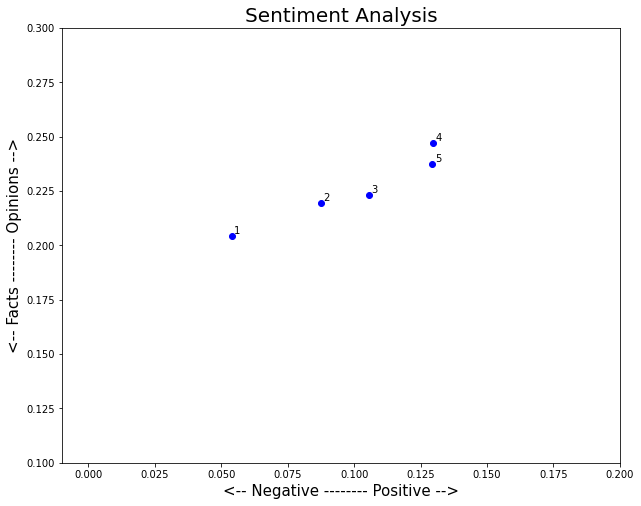

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df2.polarity.loc[index]
    y = df2.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, index, fontsize=10)
    plt.xlim(-.01, .2) 
    plt.ylim(.1, .3) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show();

In [17]:

df3= pd.DataFrame()
for i in range (0,2):
  df3.loc[i,'polarity']= (df.head(100000).loc[df.Good_reviews == i].polarity.mean())
  df3.loc[i,'subjectivity']= (df.head(100000).loc[df.Good_reviews == i].subjectivity.mean())
  
df3

,polarity,subjectivity
0,0.092878,0.219080
1,0.129450,0.239567


In [26]:
df3['review']= df.reviews
#df3['review']
df3.rename(columns={0:'Bad Reviews',1:'Good Reviews'}, inplace=True)

In [29]:
df3

,polarity,subjectivity,review
0,0.092878,0.219080,auf die funktion der box gehe ich nur kurz ein...
1,0.129450,0.239567,ich hielt die toniebox immer für einen überteu...


In [33]:
df3.index

Int64Index([0, 1], dtype='int64')

In [37]:

# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [10, 8]

# for index, review in enumerate(df3.index):
#     x = df3.polarity.loc['review']
#     y = df3.subjectivity.loc['review']
#     plt.scatter(x, y, color='blue')
#     plt.text(x+.001, y+.001, df3['review'][index], fontsize=10)
#     plt.xlim(-.06, .2) 
#     plt.ylim(.2, .3) 
    
# plt.title('Sentiment Analysis', fontsize=20)
# plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
# plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# plt.show()

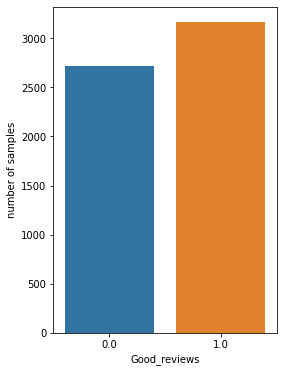

In [39]:
# distribution good_reviews
a = df.groupby(['Good_reviews'])['asin'].count()
a = a.reset_index()
a = a.rename(columns={'asin': 'number of samples'})
fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x='Good_reviews', y='number of samples', data=a);

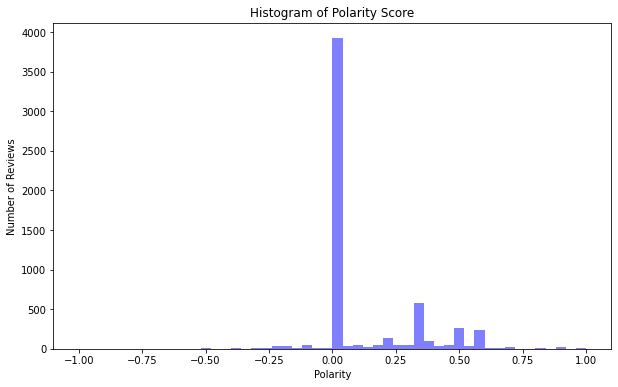

In [49]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();
     

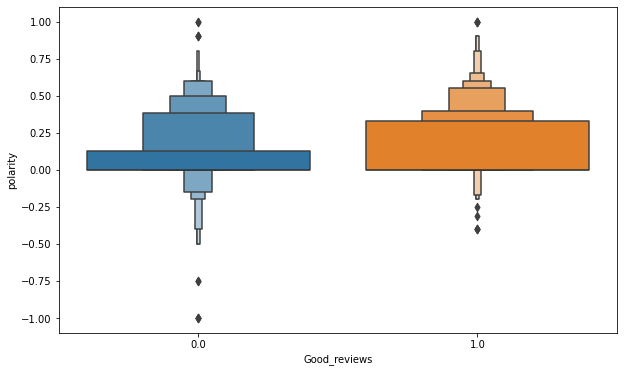

In [50]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='polarity', data=df)
plt.show();
#some bad reviews that has high polarity (positive statement)

In [51]:
df.loc[(df.polarity == 1 & (df.Good_reviews == 0))].reviews.head(10).tolist()   

['die box ist ein hübsches gerät leider ist sie nicht robust wie man es von einem gerät für kinder erwartet nach 4 monaten ist das eine ohr schon defektlaut der tonies support seite können diese ohren nur durch zähne oder scheren beschädigt werden es geht auch durch lauter und leiser machenschönes teil leider nicht robust wie gedacht',
 'hab die toniebox für meine kindergartenkinder gekauft da sie leicht der handhabung und gefahrlos von kindern genutzt werden kann sie ist der hit und die kinder lieben die box die installation dank anleitung war gut zu bewältigen wenn auch mit viel nachlesen beim ersten mal sie ist leicht und hat eine tolle tonqualität lautstärkenmöglichkeiten können der app eingestellt werden da kann meines erachtens nichts kaputt gehen und die kinder dürfen sie auch alleine benutzen den kreativtonie finde ich toll man kann diesen selbst mit der app besprechen oder selbst gekaufte lieder darauf überspielen sicher auch ein tolles geschenk für eigene kinder neffen nichte

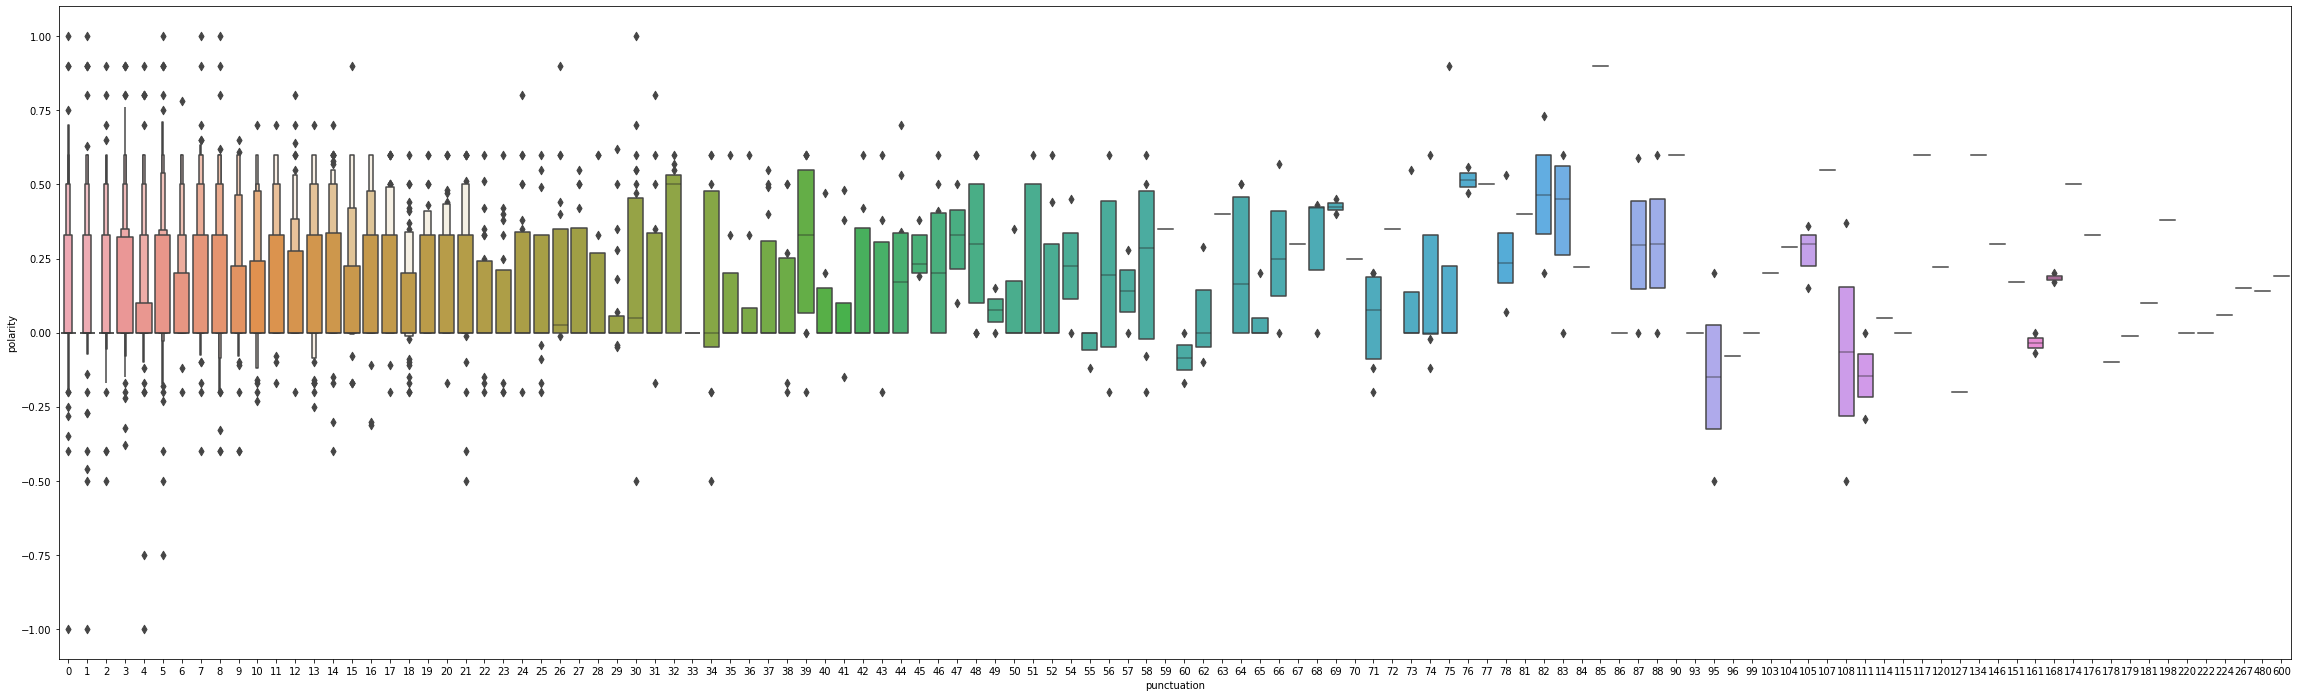

In [52]:
plt.figure(figsize=(40,12))
sns.boxenplot(x='punctuation', y='polarity', data=df)
plt.show();

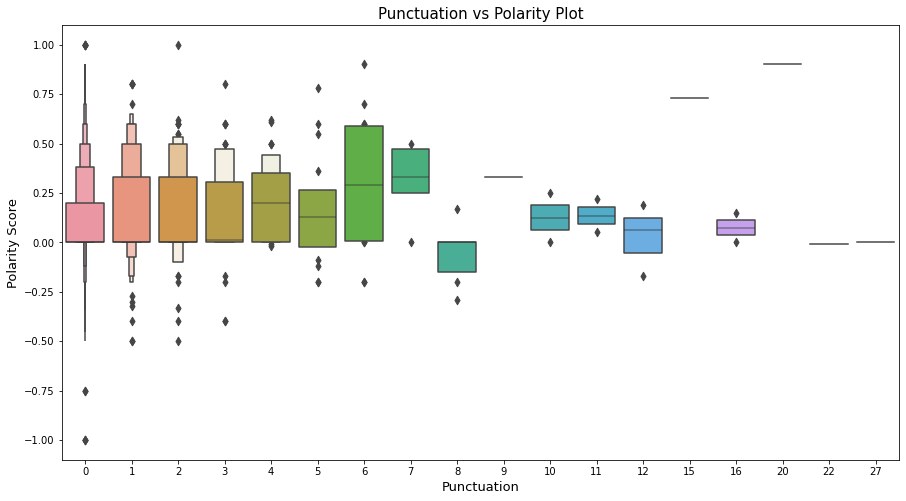

In [53]:
plt.figure(figsize=(15,8))
df3= df.loc[df.upper <= 50]
sns.boxenplot(x='upper', y='polarity', data=df3)
plt.xlabel('Punctuation', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Punctuation vs Polarity Plot', fontsize=15)
plt.show();

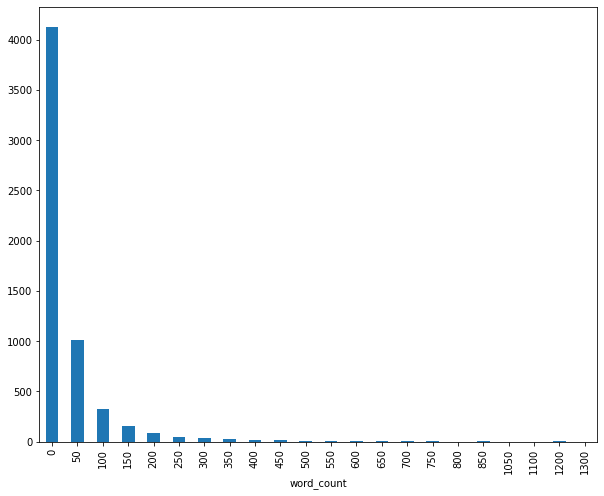

In [54]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

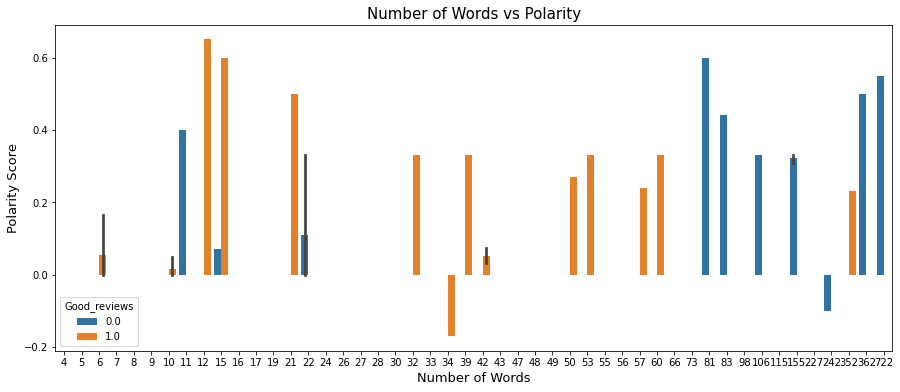

In [55]:
df_sub= df.loc[df.word_count //10*10]
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();
#It looks like, good reviwes has not more number of words overall.

Subjectivity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


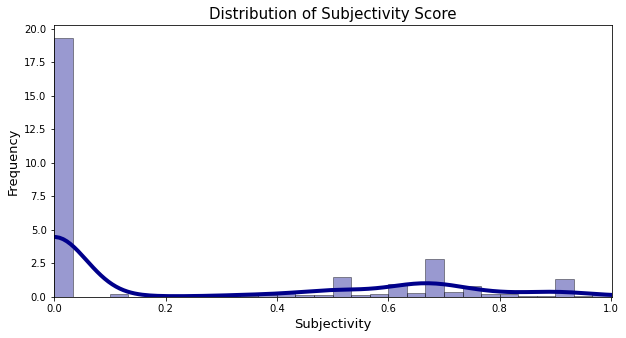

In [57]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15);

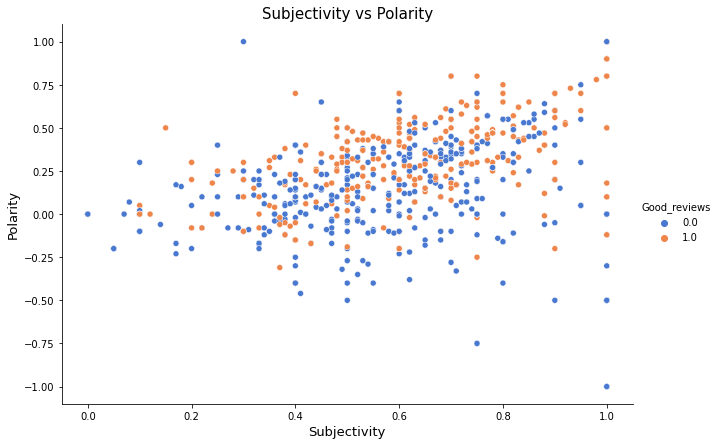

In [58]:
sns.relplot(x="subjectivity", y="polarity", hue="Good_reviews", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=df)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=15)
plt.show();

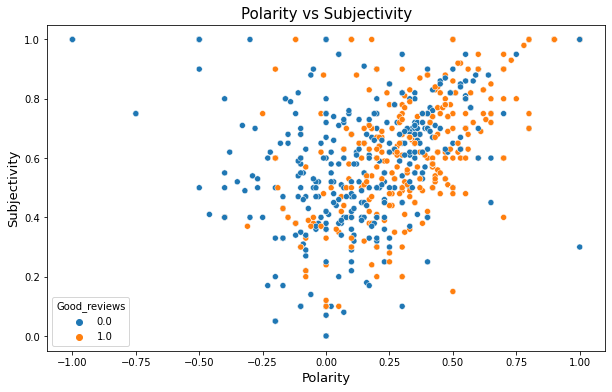

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="Good_reviews", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

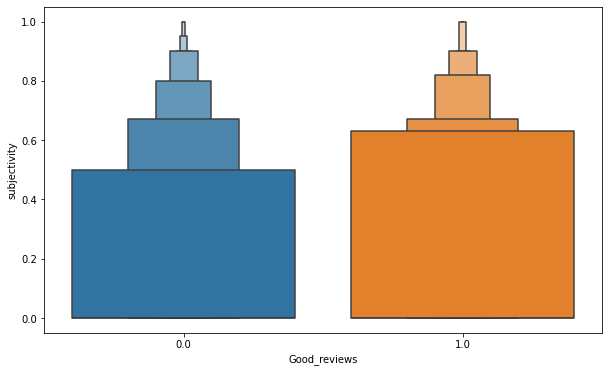

In [60]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='subjectivity', data=df)
plt.show();

In [62]:
# Top 10 reviews that have highest polarity (most positive sentiment) but 'good review' value is 0, and most subjective (opinion), sarcasm is a reason for high polarity score
df.loc[(df["Good_reviews"] == 0) & (df.polarity == 1 ) & (df.subjectivity ==1), "reviews"].head(10).tolist()

['got construction set prek classroom thought would awesome sensory constancy fuss box trying fix iti thought kenetic sand brand durable thisgreat box came fell apart unpacking']

In [65]:
# 2 sample reviews that have highest polarity (most positive sentiment) and 'good review' value is 1, and most subjective (opinion)
df.loc[(df["Good_reviews"] == 1) & (df.polarity == 1 ) & (df.subjectivity ==1), "reviews"].sample(2).tolist()

['excellent setexcellent',
 'premium quality perfect product kniffel homethe premium home set']